In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
def clean_metabolite_ids(df, column='Compound'):
    new = df.copy()
    # Remove (1), (2) etc. from the index
    new[column] = df[column].str.replace(r"\(.*\)", "") 
    # Remove leading and trailing whitespaces
    new[column] = new[column].str.strip()
    # Straify upper and lower case 
    new[column] = new[column].str.upper()
    return new

In [3]:
df_soleus = pd.read_csv('./../data/soleus_myocyte_pmt_tracing_labeling_combined_240731.csv')   
df_soleus = clean_metabolite_ids(df_soleus)
df_soleus.head()

/tmp/ipykernel_25230/3325772090.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new[column] = df[column].str.replace(r"\(.*\)", "")


,Compound,C_Label,Control_100ppm_1,Control_100ppm_2,Control_100ppm_3,Control_500ppm_1,Control_500ppm_2,Control_500ppm_3,Insulin_100ppm_1,Insulin_100ppm_2,Insulin_100ppm_3,Insulin_500ppm_1,Insulin_500ppm_2,Insulin_500ppm_3
0,PHENYLALANINE,0,1.0,1.0,1.0,0.994558,1.0,1.0,0.993559,1.0,1.0,1.0,0.994757,1.0
1,PHENYLALANINE,1,0.0,0.0,0.0,0.005442,0.0,0.0,0.006441,0.0,0.0,0.0,0.005243,0.0
2,PHENYLALANINE,2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,PHENYLALANINE,3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,PHENYLALANINE,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [4]:
df_soleus_mlt = df_soleus.melt(id_vars=['C_Label','Compound'], ignore_index=True)

# Parse the variable column into three columns
df_soleus_mlt['insulin'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[0]
df_soleus_mlt['palmitate'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[1]
df_soleus_mlt['sample'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[2]

# Change naming 100ppm -> 100 \uM
df_soleus_mlt['palmitate'] = df_soleus_mlt['palmitate'].str.replace('ppm', ' \u03BCM')


df_soleus_mlt = df_soleus_mlt.drop(columns=['variable'])
df_soleus_mlt.head()


,C_Label,Compound,value,insulin,palmitate,sample
0,0,PHENYLALANINE,1.0,Control,100 μM,1
1,1,PHENYLALANINE,0.0,Control,100 μM,1
2,2,PHENYLALANINE,0.0,Control,100 μM,1
3,3,PHENYLALANINE,0.0,Control,100 μM,1
4,4,PHENYLALANINE,0.0,Control,100 μM,1


In [5]:
# Plot the data into a stacked bar graph for each carbon label 
def stacked_bar_graph(df, metabolite, groups=['insulin', 'palmitate'], value='value', cmap='tab20'):

    df = df[df['Compound'] == metabolite.upper()]

    # Make a condition specific column
    df.loc[:,'condition'] = df.loc[:,groups].apply(lambda x: ' '.join(x), axis=1)
    # Group by the condition and the carbon label
    groups = ['C_Label', 'condition']    

    mean = df.groupby(groups)[value].mean().reset_index().pivot(index='condition', columns='C_Label', values=value)
    std = df.groupby(groups)[value].std().reset_index().pivot(index='condition', columns='C_Label', values=value)

    # Plot the data as a stacked bar graph 
    ax = mean.plot.bar(yerr=std, stacked=True, colormap=cmap, figsize=(3,4),  
                       error_kw=dict(ecolor='k', capthick=0.5, elinewidth=1, capsize=3, zorder=10))
    
    # Add the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel('Fraction labeled')
    

    return ax

/tmp/ipykernel_25230/4099652744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'condition'] = df.loc[:,groups].apply(lambda x: ' '.join(x), axis=1)


<AxesSubplot: xlabel='condition', ylabel='Fraction labeled'>

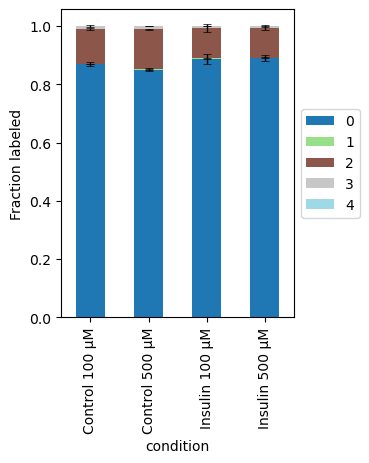

In [6]:
stacked_bar_graph(df_soleus_mlt, 'malate')

/tmp/ipykernel_25230/4099652744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'condition'] = df.loc[:,groups].apply(lambda x: ' '.join(x), axis=1)


<AxesSubplot: xlabel='condition', ylabel='Fraction labeled'>

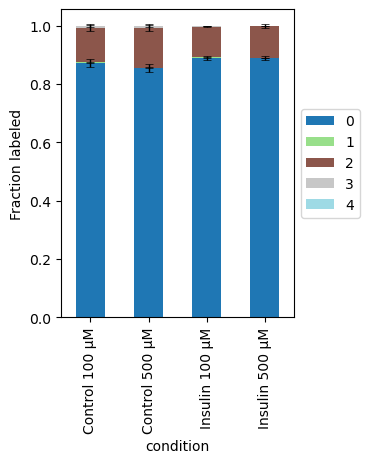

In [7]:
stacked_bar_graph(df_soleus_mlt, 'fumarate')

/tmp/ipykernel_25230/4099652744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'condition'] = df.loc[:,groups].apply(lambda x: ' '.join(x), axis=1)


<AxesSubplot: xlabel='condition', ylabel='Fraction labeled'>

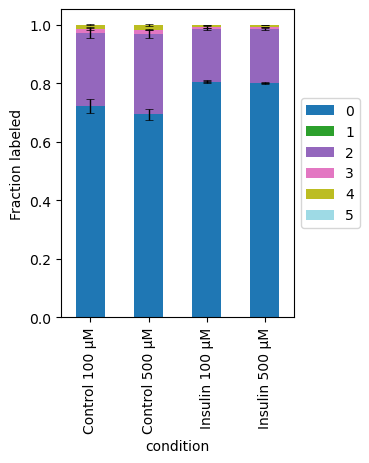

In [8]:
stacked_bar_graph(df_soleus_mlt, 'glutamate')

/tmp/ipykernel_25230/4099652744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'condition'] = df.loc[:,groups].apply(lambda x: ' '.join(x), axis=1)


<AxesSubplot: xlabel='condition', ylabel='Fraction labeled'>

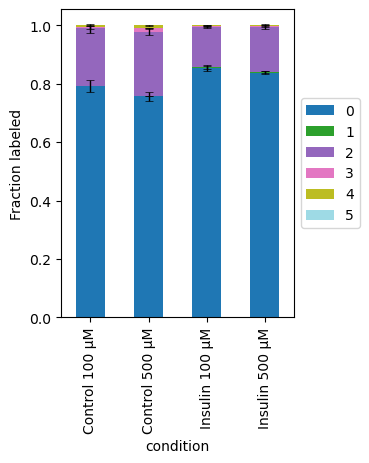

In [9]:
stacked_bar_graph(df_soleus_mlt, 'a-ketoglutarate')

/tmp/ipykernel_25230/4099652744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'condition'] = df.loc[:,groups].apply(lambda x: ' '.join(x), axis=1)


<AxesSubplot: xlabel='condition', ylabel='Fraction labeled'>

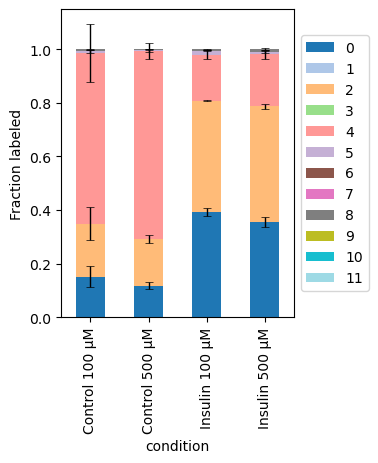

In [10]:
stacked_bar_graph(df_soleus_mlt, 'Butyryl-L-carnitine')

/tmp/ipykernel_25230/4099652744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'condition'] = df.loc[:,groups].apply(lambda x: ' '.join(x), axis=1)


<AxesSubplot: xlabel='condition', ylabel='Fraction labeled'>

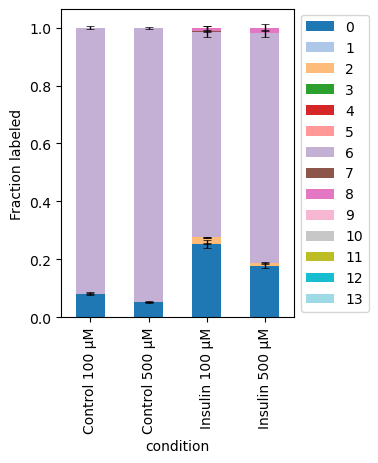

In [11]:
stacked_bar_graph(df_soleus_mlt, 'hexanoyl carnitine')

/tmp/ipykernel_25230/4099652744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'condition'] = df.loc[:,groups].apply(lambda x: ' '.join(x), axis=1)


<AxesSubplot: xlabel='condition', ylabel='Fraction labeled'>

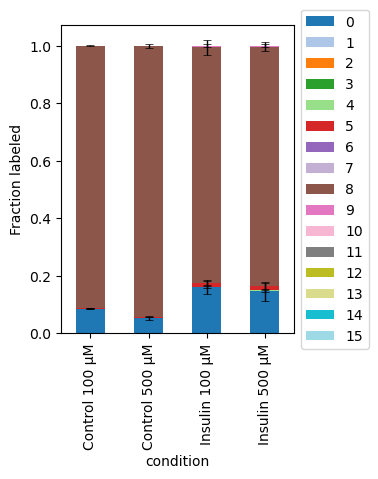

In [12]:
stacked_bar_graph(df_soleus_mlt, 'octenoylcarnitine')